# Importación Librerías

In [1]:
import pandas as pd
from io import StringIO
import json
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ast
from collections import Counter

# Importación Archivos

## Reviews Estados - Google

In [22]:
# Leer el archivo y almacenar cada línea en una lista
lines = []

for i in range (18):
    file='reviews-estados/review-California/'+str(i+1)+'.json'
    with open(file, 'r') as file:
        for line in file:
            lines.append(line)

In [23]:
# Unir todas las líneas en un solo string y leerlo como un DataFrame
all_lines = ''.join(lines)
df_reviews = pd.read_json(StringIO(all_lines), lines=True)

In [24]:
del lines
del all_lines
del file
del line

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB


Espacio que ocupan
Carpeta: 763 Mb (3,8 segundos en importar para una lista, 48,44 segundos para pasarlo a dataframe)
Dataframe: 164,8 Mb
CSV: 545 Mbs

## Metadata  - Google

tamaño:
carpeta: 2,76 Gb
dataframe 370 Mb
csv 2,3 Gb

In [2]:
# Lista para almacenar los DataFrames
dfs = []

# Ruta de la carpeta donde se encuentran tus archivos JSON
folder_path = 'metadata-sitios/'

# Itera sobre los archivos JSON y lee cada uno en un DataFrame
for i in range(1, 12):
    file_path = os.path.join(folder_path, f'{i}.json')
    df = pd.read_json(file_path, lines=True)
    dfs.append(df)

In [3]:
# Concatena todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

In [8]:
#eliminar archivos innecesarios para liberar memoria
del df
del dfs
del file_path
del folder_path

In [4]:
#extraer el estado de la dirección
df_final['estado'] = df_final['address'].str.extract(r', ([A-Z]{2}) \d{5}')


In [6]:
#exporto a csv
df_final.to_parquet('')

In [5]:
#filtro los datos de California, para liberar espacio
df_metadatosCA = df_final[df_final['estado'] == 'CA']

In [6]:
df_metadatosCA.reset_index(inplace=True)

In [7]:
df_metadatosCA.drop('index', axis='columns', inplace=True)

C:\Users\feder\AppData\Local\Temp\ipykernel_25372\1024337664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadatosCA.drop('index', axis='columns', inplace=True)


In [10]:
df_metadatosCA.to_parquet('metadatosCA.parquet', engine='pyarrow')

In [9]:
del df_final


## Business - YELP

## User - YELP

## Review - YELP

## Tips/Checkin - YELP

# EDA

## Reviews Estados - Google

In [48]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB


### Requerimientos de Data Warehouse

#### user_id

Es una entero de 21 cifras. No lo soporta en int de pandas, hay que pasar al int nativo de Python.
Para Pandas va a ser un object entonces, pero para Python un entero.
Sin nulos.

In [25]:
df_reviews['user_id']

0          1.089912e+20
1          1.112903e+20
2          1.126404e+20
3          1.174403e+20
4          1.005808e+20
               ...     
2699995    1.139124e+20
2699996    1.180461e+20
2699997    1.071072e+20
2699998    1.172404e+20
2699999    1.117537e+20
Name: user_id, Length: 2700000, dtype: float64

In [34]:
df_reviews['user_id']=df_reviews['user_id'].apply(int)

In [66]:
df_reviews['user_id'].isna().sum()

0

#### name

Es un texto. El que más valor tiene, tiene 77 caracteres.
Hay caracteres en todos los idiomas (chino, japonés, etc).
Sin nulos.

In [43]:
cual=df_reviews['name'].apply(len)

In [46]:
cual.sort_values(ascending=False)

181901     77
864517     74
1574832    74
658053     74
1720881    74
           ..
1580582     1
1669924     1
1540558     1
2091968     1
133906      1
Name: name, Length: 2700000, dtype: int64

In [47]:
df_reviews['name'][181901]

'image system photographie Cruseilles Annecy Genève (Photographe Haute Savoie)'

In [65]:
df_reviews['name'].isna().sum()

0

In [173]:
df_reviews['name'].info()

<class 'pandas.core.series.Series'>
Index: 2624758 entries, 0 to 2699999
Series name: name
Non-Null Count    Dtype 
--------------    ----- 
2624758 non-null  object
dtypes: object(1)
memory usage: 40.1+ MB


#### time

Valores enteros de 13 cifras.
Marcas de tiempo en milisegundos desde la época Unix (1970-01-01).
Sin nulos.

In [48]:
df_reviews['time']

0          1609909927056
1          1612849648663
2          1583643882296
3          1551938216355
4          1494910901933
               ...      
2699995    1553382802382
2699996    1509453169393
2699997    1614453586811
2699998    1569739943903
2699999    1521661727317
Name: time, Length: 2700000, dtype: int64

In [63]:
df_reviews['time'].isna().sum()

0

In [171]:
df_reviews['time'].info()

<class 'pandas.core.series.Series'>
Index: 2624758 entries, 0 to 2699999
Series name: time
Non-Null Count    Dtype
--------------    -----
2624758 non-null  int64
dtypes: int64(1)
memory usage: 40.1 MB


#### rating

Enteros del 1 al 5.
Sin nulos.

In [54]:
df_reviews['rating'].unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [62]:
df_reviews['rating'].isna().sum()

0

In [172]:
df_reviews['rating'].info()

<class 'pandas.core.series.Series'>
Index: 2624758 entries, 0 to 2699999
Series name: rating
Non-Null Count    Dtype
--------------    -----
2624758 non-null  int64
dtypes: int64(1)
memory usage: 40.1 MB


#### text

1170964 nulos (previo a eliminar los datos duplicados)

In [76]:
df_reviews[df_reviews['text']==' ']

,user_id,name,time,rating,text,pics,resp,gmap_id


In [70]:
cual = df_reviews['text'].fillna('').apply(len)

In [81]:
cual.sort_values(ascending= False).head(20)

739381     8360
1123967    6558
379508     5706
982612     5357
457539     4901
2440085    4847
83241      4558
869971     4513
1899203    4501
310166     4441
2176644    4423
187057     4362
1171707    4357
1780872    4353
1780879    4353
271700     4328
85666      4299
2622263    4298
2094237    4289
2119331    4266
Name: text, dtype: int64

In [84]:
cual=cual[cual != 0]

In [86]:
cual.describe()

count    1.529036e+06
mean     1.324193e+02
std      2.007083e+02
min      1.000000e+00
25%      3.200000e+01
50%      7.000000e+01
75%      1.540000e+02
max      8.360000e+03
Name: text, dtype: float64

In [67]:
df_reviews['text'].isna().sum()

1170964

In [174]:
df_reviews['text'].info()

<class 'pandas.core.series.Series'>
Index: 2624758 entries, 0 to 2699999
Series name: text
Non-Null Count    Dtype 
--------------    ----- 
1460935 non-null  object
dtypes: object(1)
memory usage: 40.1+ MB


#### pics

In [88]:
df_reviews['pics'][df_reviews['pics'].isna() == False]

24         [{'url': ['https://lh5.googleusercontent.com/p...
126        [{'url': ['https://lh5.googleusercontent.com/p...
128        [{'url': ['https://lh5.googleusercontent.com/p...
129        [{'url': ['https://lh5.googleusercontent.com/p...
130        [{'url': ['https://lh5.googleusercontent.com/p...
                                 ...                        
2699573    [{'url': ['https://lh5.googleusercontent.com/p...
2699656    [{'url': ['https://lh5.googleusercontent.com/p...
2699919    [{'url': ['https://lh5.googleusercontent.com/p...
2699939    [{'url': ['https://lh5.googleusercontent.com/p...
2699960    [{'url': ['https://lh5.googleusercontent.com/p...
Name: pics, Length: 99290, dtype: object

In [90]:
df_reviews['pics'][24]

[{'url': ['https://lh5.googleusercontent.com/p/AF1QipNBpj0NUQ3GblfewsZxQX_OrXs9QlW8R2yHB2eP=w150-h150-k-no-p']}]

In [91]:
df_reviews['pics'].isna().sum()

2600710

In [107]:
cual2 = df_reviews['pics'].fillna('').apply(lambda x: len(str(x)))

In [110]:
cual2.sort_values(ascending=False).unique()

array([5600, 5550, 5488, 5376, 5264, 5152, 5040, 4995, 4928, 4816, 4704,
       4662, 4592, 4480, 4368, 4256, 4144, 4032, 3920, 3808, 3696, 3584,
       3472, 3441, 3360, 3248, 3136, 3024, 2997, 2912, 2886, 2800, 2688,
       2664, 2576, 2464, 2442, 2352, 2331, 2240, 2220, 2128, 2109, 2016,
       1998, 1904, 1887, 1792, 1776, 1680, 1665, 1568, 1554, 1456, 1443,
       1344, 1332, 1232, 1221, 1120, 1110, 1008,  999,  990,  896,  888,
        784,  777,  770,  672,  666,  660,  648,  560,  555,  550,  448,
        444,  336,  333,  330,  324,  224,  222,  220,  112,  111,  110,
          0], dtype=int64)

In [111]:
cual2[cual2 != 0].describe()

count    99290.000000
mean       337.833447
std        499.738985
min        110.000000
25%        112.000000
50%        224.000000
75%        336.000000
max       5600.000000
Name: pics, dtype: float64

#### resp

In [96]:
df_reviews['resp'][df_reviews['resp'].isna() == False][30]

{'time': 1631072651706,
 'text': 'Thanks so much for your business and for taking the time to post a great review. Glad to hear our crew was so helpful and friendly and that we were able to get the family outfitted quickly and efficiently. Look forward to hearing from you in the future.'}

In [92]:
df_reviews['resp'].isna().sum()

2454831

In [100]:
cual2 = df_reviews['resp'].fillna('').apply(lambda x: len(str(x)))

In [104]:
cual2.sort_values(ascending=False).head(20)

132531     4041
90668      4040
237605     4017
692469     4001
1358752    3923
1033090    3873
259455     3819
1150136    3798
330673     3794
506628     3775
1083758    3768
657500     3765
532441     3724
1670422    3706
247223     3700
334364     3639
835899     3579
880217     3431
1537546    3421
291859     3320
Name: resp, dtype: int64

In [106]:
cual2[cual2 != 0].describe()

count    245169.000000
mean        174.725773
std         147.989795
min          36.000000
25%          83.000000
50%         136.000000
75%         223.000000
max        4041.000000
Name: resp, dtype: float64

In [176]:
df_reviews['resp_text'].info()

<class 'pandas.core.series.Series'>
Index: 2624758 entries, 0 to 2699999
Series name: resp_text
Non-Null Count   Dtype 
--------------   ----- 
238457 non-null  object
dtypes: object(1)
memory usage: 40.1+ MB


#### gmap_id

In [93]:
df_reviews['gmap_id'].isna().sum()

0

In [113]:
cual2 = df_reviews['gmap_id'].apply(len)

In [118]:
cual2.unique()

array([37, 36, 35, 34, 22, 33], dtype=int64)

In [119]:
del cual
del cual2
del i

### Duplicados

Considerando que una persona no puede realizar dos reviews al mismo tiempo, se considera un dato duplicado aquel que tenga el mismo usuario y el mismo tiempo.

In [128]:
print('Datos duplicados :'+str(df_reviews.duplicated(subset=['user_id','time','gmap_id'], keep='first').sum()))

Datos duplicados :12


Los datos duplicados se eliminarán luego del tratamiento de la columna pics, que tiene una lista

#### largo de pics (duplicados)

In [121]:
df_reviews['largo_pics'] = df_reviews['pics'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [122]:
df_reviews.drop(columns=['pics'], inplace=True)

#### largo de resp (duplicados)

In [123]:
#genero una función para extraer los datos del diccionario
def extract_resp_values(resp):
    if isinstance(resp, dict):
        return resp.get('time', None), resp.get('text', None)
    else:
        return None, None

In [124]:
#la aplico al dataframe
df_reviews['resp_time'], df_reviews['resp_text'] = zip(*df_reviews['resp'].apply(extract_resp_values))

In [125]:
#elimino la columna que ya no me sirve más
df_reviews.drop(columns=['resp'], inplace=True)

#### Eliminación de duplicados

In [126]:
df_reviews.drop_duplicates(inplace= True)

In [127]:
print('Se eliminaron '+str(2700000-len(df_reviews))+' registros duplicados')

Se eliminaron 75242 registros duplicados


### Nulos

In [129]:
print('Nulos de user_id: '+str(df_reviews['user_id'].isnull().sum()))
print('Nulos de name: '+str(df_reviews['name'].isnull().sum()))
print('Nulos de time: '+str(df_reviews['time'].isnull().sum()))
print('Nulos de rating: '+str(df_reviews['rating'].isnull().sum()))
print('Nulos de text: '+str(df_reviews['text'].isnull().sum()))
print('Nulos de pics: '+str(len(df_reviews[df_reviews['largo_pics']==0])))
print('Nulos de resp: '+str(df_reviews['resp_text'].isnull().sum()))

Nulos de user_id: 0
Nulos de name: 0
Nulos de time: 0
Nulos de rating: 0
Nulos de text: 1163823
Nulos de pics: 2530146
Nulos de resp: 2386301


### Rating

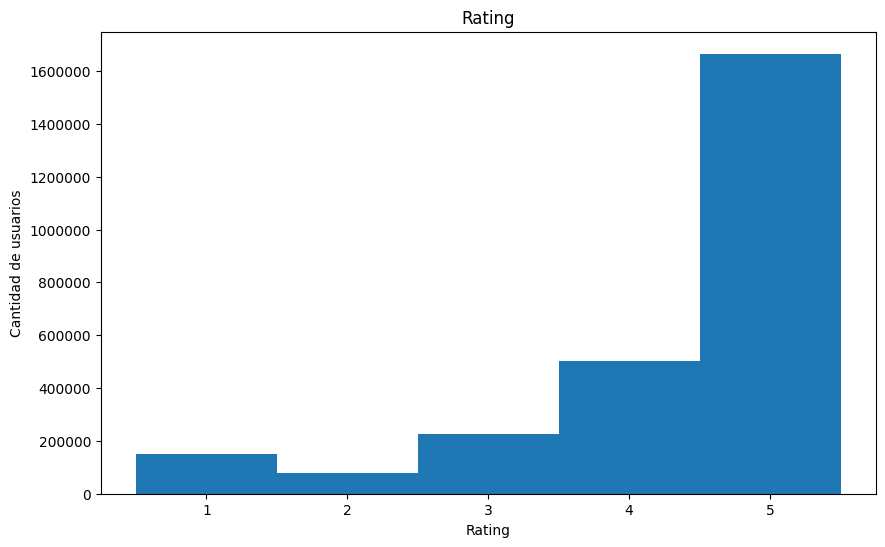

In [170]:
# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma con bins centrados en 1, 2, 3, 4 y 5
plt.hist(df_reviews['rating'], bins=range(1, 7), align='left')

# Título del gráfico y etiquetas de los ejes
plt.title('Rating')
plt.ylabel('Cantidad de usuarios')
plt.xlabel('Rating')

# Ajustar el formato del eje y a enteros
plt.gca().get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%d'))

# Establecer los ticks del eje x para mostrar solo los números 1, 2, 3, 4 y 5
plt.xticks(range(1, 6))

#guarda archivo
plt.savefig('Imagenes/EDA-GoogleMaps/ratingsxreviews.png')

# Mostrar el gráfico
plt.show()

### pics

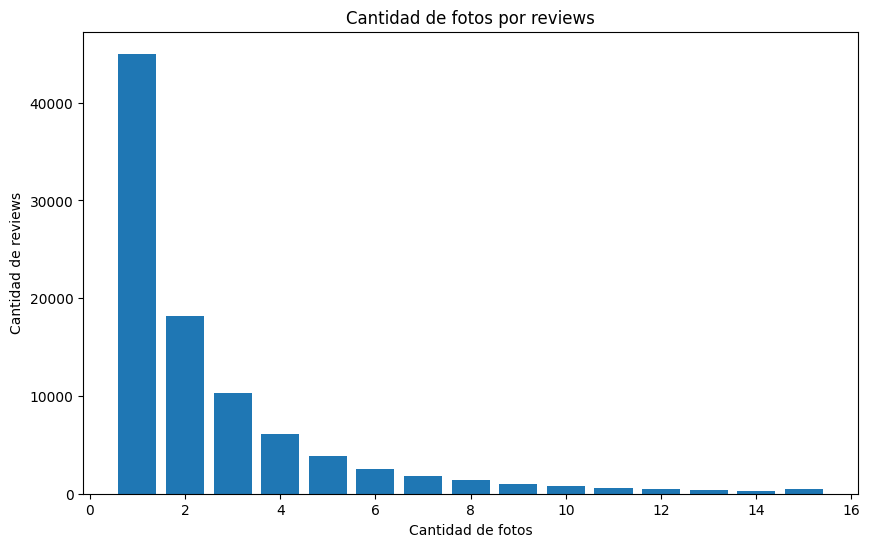

In [143]:
# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma con 15 bins para representar cada valor individualmente en el eje x
plt.hist(df_reviews['largo_pics'], bins=range(1, 17), align='left', rwidth=0.8)

# Título del gráfico y etiquetas de los ejes
plt.title('Cantidad de fotos por reviews')
plt.ylabel('Cantidad de reviews')
plt.xlabel('Cantidad de fotos')

# Ajustar el formato del eje y a enteros
plt.gca().get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%d'))

#guarda archivo
plt.savefig('Imagenes/EDA-GoogleMaps/Fotosxreviews.png')

# Mostrar el gráfico
plt.show()

### text

In [139]:
counts=[len(df_reviews)-df_reviews['text'].isna().sum(),df_reviews['text'].isna().sum()]

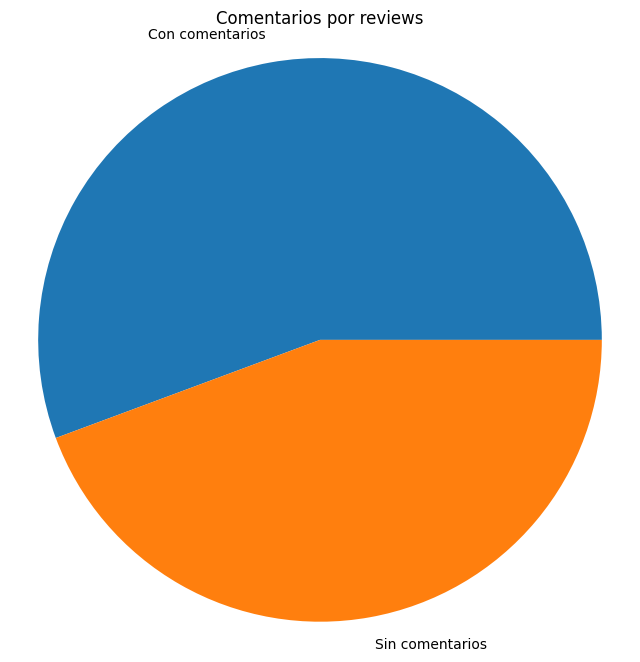

In [142]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Con comentarios', 'Sin comentarios'])
plt.title('Comentarios por reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Imagenes/EDA-GoogleMaps/Comentariosxreviews.png')
plt.show()

### resp

In [61]:
counts=[len(df_reviews)-df_reviews['resp_text'].isna().sum(),df_reviews['resp_text'].isna().sum()]

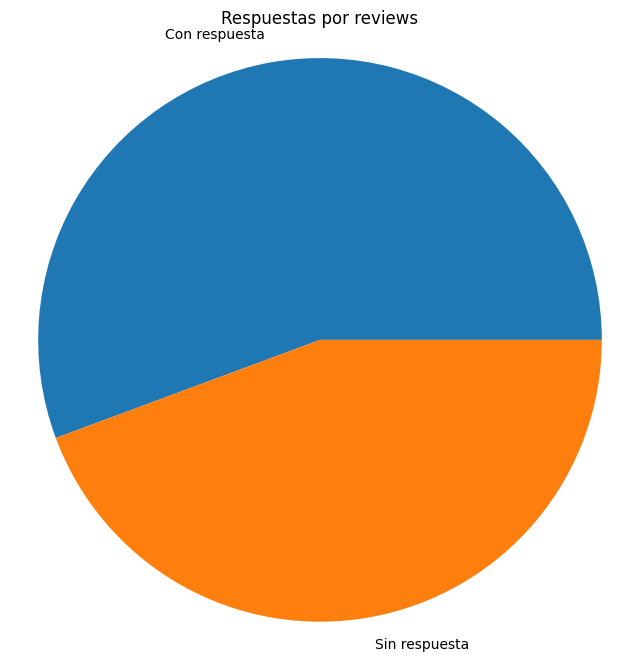

In [145]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Con respuesta', 'Sin respuesta'])
plt.title('Respuestas por reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Imagenes/EDA-GoogleMaps/Respuestasxreviews.png')
plt.show()

### user_id

In [147]:
df_reviews['user_id'].nunique()

973518

Los 2.700.000 reviews fueron realizados por 973.518 usuarios

In [64]:
df_reviews.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'gmap_id', 'largo_pics',
       'resp_time', 'resp_text'],
      dtype='object')

In [148]:
df_reviews_users = df_reviews.groupby('user_id').agg({
    'time':'count',
    'text': 'count',
    'rating': 'mean',
    'largo_pics': 'sum',
    'resp_time': 'count',
    # Para contar los valores únicos en una columna, se puede usar 'nunique'
    'gmap_id': pd.Series.nunique
}).reset_index()

# Renombra las columnas para reflejar las métricas calculadas
df_reviews_users.columns = ['user_id', 'count_reviews', 'count_text', 'avg_rating', 'total_pics', 'count_resp', 'count_unique_gmap_id']

#### reviews by user

In [149]:
max(df_reviews_users['count_reviews'])

307

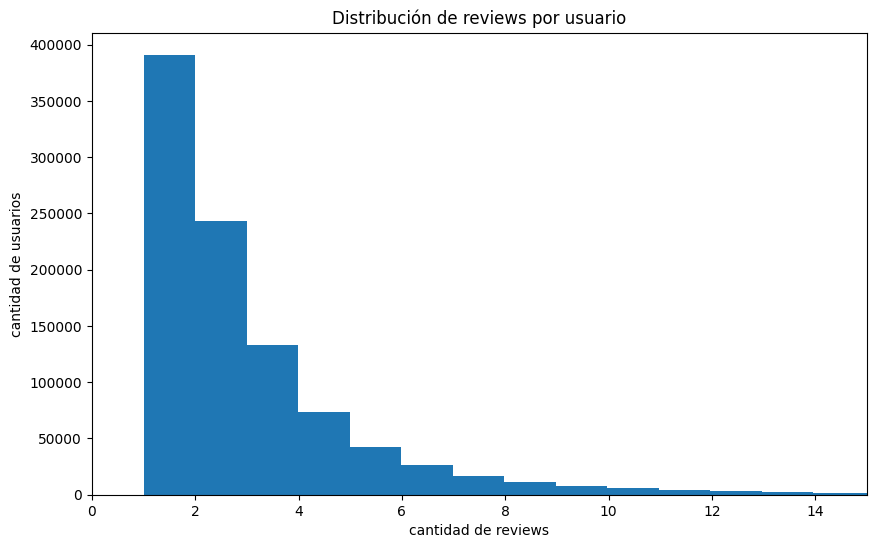

In [151]:
plt.figure(figsize=(10, 6))
plt.hist(df_reviews_users['count_reviews'],bins=307)  # Usa dropna() para excluir valores NaN
plt.title('Distribución de reviews por usuario')  # Añade un título al gráfico
plt.ylabel('cantidad de usuarios')  # Etiqueta para el eje Y
plt.xlabel('cantidad de reviews')  # Etiqueta para el eje X
plt.xlim(0,15)
plt.savefig('Imagenes/EDA-GoogleMaps/reviewsxusuario.png')
plt.show()

#### average rating by user

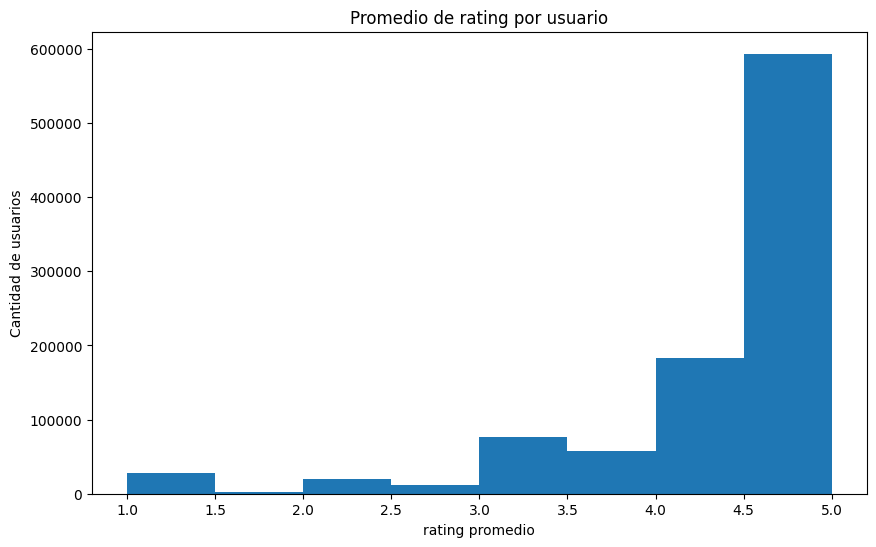

In [156]:
plt.figure(figsize=(10, 6))
plt.hist(df_reviews_users['avg_rating'], bins=8)  # Usa dropna() para excluir valores NaN
plt.title('Promedio de rating por usuario')  # Añade un título al gráfico
plt.ylabel('Cantidad de usuarios')  # Etiqueta para el eje Y
plt.xlabel('rating promedio')  # Etiqueta para el eje Y
plt.savefig('Imagenes/EDA-GoogleMaps/Ratingxusuario.png')
plt.show()

### pictures by users

In [157]:
max(df_reviews_users['total_pics'])

528

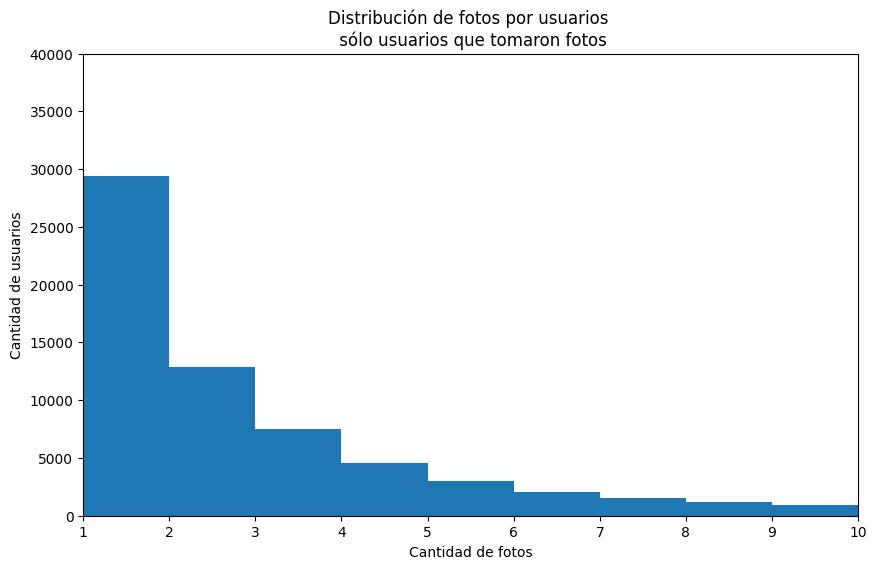

In [159]:
plt.figure(figsize=(10, 6))
plt.hist(df_reviews_users['total_pics'].dropna(),bins=528)  # Usa dropna() para excluir valores NaN
plt.title('Distribución de fotos por usuarios \n sólo usuarios que tomaron fotos')  # Añade un título al gráfico
plt.ylabel('Cantidad de usuarios')  # Etiqueta para el eje Y
plt.ylim(0,40000) 
plt.xlabel('Cantidad de fotos')  # Etiqueta para el eje X
plt.xlim(1,10) 
plt.savefig('Imagenes/EDA-GoogleMaps/Fotosxusuario.png')
plt.show()

### name

### time

### rating

### text

### pics

### resp  

### gmap_id

## Metadata - Google

### Duplicados

In [ ]:
df_metadatosCA.drop_duplicates(subset='gmap_id', inplace=True)
df_metadatosCA.reset_index(inplace=True)
df_metadatosCA.drop(columns='index', inplace=True)

### Requerimientos para datawarehouse

In [11]:
df_metadatosCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297293 entries, 0 to 297292
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              297293 non-null  object 
 1   address           297293 non-null  object 
 2   gmap_id           297293 non-null  object 
 3   description       31902 non-null   object 
 4   latitude          297293 non-null  float64
 5   longitude         297293 non-null  float64
 6   category          295387 non-null  object 
 7   avg_rating        297293 non-null  float64
 8   num_of_reviews    297293 non-null  int64  
 9   price             31580 non-null   object 
 10  hours             230103 non-null  object 
 11  MISC              244162 non-null  object 
 12  state             233398 non-null  object 
 13  relative_results  273256 non-null  object 
 14  url               297293 non-null  object 
 15  estado            297293 non-null  object 
dtypes: float64(3), int64

#### name

In [24]:
(df_metadatosCA['name']==' ').sum()

0

In [63]:
df_metadatosCA['name'].apply(len).sort_values(ascending=False).head(15)

63983     246
141799    245
151737    240
58397     230
60292     215
114916    215
85862     212
144878    212
223446    210
239818    209
123832    209
91173     208
115746    204
61241     201
235618    177
Name: name, dtype: int64

#### address

In [32]:
print((df_metadatosCA['address']==' ').sum())
df_metadatosCA['address'].apply(len).sort_values(ascending=False).head(5)
print(df_metadatosCA['address'][df_metadatosCA['address'].apply(len).idxmin()])

0


63983     297
58397     288
141799    288
151737    272
85862     255
144878    254
114916    252
123832    251
60292     249
223446    249
91173     247
239818    247
95248     246
115746    245
246985    245
Name: address, dtype: int64

In [108]:
print(df_metadatosCA['address'][df_metadatosCA['address'].apply(len).idxmin()])

Weed, CA 96094


In [133]:
df_metadatosCA['address'][294423]

'Green Hills Park, Millbrae, CA 94030'

16        2
39        2
50        2
68        2
106       2
         ..
294423    2
294476    2
294521    2
294576    2
294585    2
Name: address, Length: 8476, dtype: int64

In [110]:
comas = df_metadatosCA['address'].apply(lambda x: str(x).count(','))

In [120]:
df_metadatosCA['address'][85862]

'Imperial Jewelry & Loan Pawn Shop Norwalk CA (Loan, Sell & Buy Gold, Silver, Diamonds, Coins, Bullion, Jewelry, Watches, Guns, Hand Bags, Guitars & Musical Instruments, Electronics, Sports Equipment, Power Tools), 11405 Firestone Blvd E, Norwalk, CA 90650'

In [119]:
comas.idxmax()

85862

In [121]:
for i in range(20):
    print(str(i)+': '+str((comas == i).sum()))

0: 0
1: 70
2: 8476
3: 265794
4: 18423
5: 1455
6: 254
7: 66
8: 24
9: 15
10: 3
11: 5
12: 3
13: 1
14: 1
15: 2
16: 1
17: 0
18: 0
19: 0


#### gmap_id

In [41]:
print((df_metadatosCA['gmap_id']==' ').sum())
print(df_metadatosCA['gmap_id'][df_metadatosCA['gmap_id'].apply(len).idxmin()])
print(df_metadatosCA['gmap_id'][df_metadatosCA['gmap_id'].apply(len).idxmax()])
print(df_metadatosCA['gmap_id'].apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['gmap_id'].apply(len).sort_values(ascending=False).tail(5))

0
0x0:0x13154eabf70b4b93
0x80c2c98c0e3c16fd:0x29ec8a728764fdf9
0         37
193271    37
193278    37
193277    37
193276    37
Name: gmap_id, dtype: int64
176870    34
3738      34
137970    33
130938    22
171772    22
Name: gmap_id, dtype: int64


#### description

In [44]:
print((df_metadatosCA['description']==' ').sum())
print(df_metadatosCA['description'][df_metadatosCA['description'].dropna().apply(len).idxmin()])
print(df_metadatosCA['description'][df_metadatosCA['description'].dropna().apply(len).idxmax()])
print(df_metadatosCA['description'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['description'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
Factory showroom selling
Old-school, colorful outpost serving homestyle Mexican dishes at the counter in a compact, no-frills interior.
225819    110
228380    110
213016    110
265524    109
71814     109
Name: description, dtype: int64
218734    50
153301    48
151928    43
195624    35
115459    24
Name: description, dtype: int64


In [31]:
df_metadatosCA['description'].dropna().apply(len).unique()

array([ 76,  98,  89,  95,  99,  80,  92,  86,  82,  85,  84,  91,  97,
       100,  68,  96,  90,  93,  60,  88,  94,  83,  70,  77,  87,  67,
        81,  61,  72,  79,  57,  75,  78,  69,  62,  74,  73,  66, 101,
        56, 103,  63,  65, 109,  50,  59,  71, 108,  24,  43,  48,  53,
        35,  64,  55, 110, 107, 105], dtype=int64)

#### latitude

In [45]:
df_metadatosCA['latitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 294593 entries, 0 to 294592
Series name: latitude
Non-Null Count   Dtype  
--------------   -----  
294593 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [46]:
df_metadatosCA['latitude']

0         34.018891
1         34.058092
2         34.023669
3         34.036694
4         34.015505
            ...    
294588    33.611202
294589    33.713194
294590    33.163214
294591    33.644645
294592    33.643829
Name: latitude, Length: 294593, dtype: float64

#### longitude

In [47]:
df_metadatosCA['longitude']

0        -118.215290
1        -118.292130
2        -118.232930
3        -118.249421
4        -118.181839
             ...    
294588   -117.864362
294589   -117.932468
294590   -117.345829
294591   -117.919316
294592   -117.928050
Name: longitude, Length: 294593, dtype: float64

#### category

In [50]:
print((df_metadatosCA['category']==' ').sum())
print(df_metadatosCA['category'][df_metadatosCA['category'].dropna().apply(len).idxmin()])
print(type(df_metadatosCA['category'][df_metadatosCA['category'].dropna().apply(len).idxmax()]))
print(df_metadatosCA['category'][df_metadatosCA['category'].dropna().apply(len).idxmax()])
print(df_metadatosCA['category'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['category'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
['Textile exporter']
<class 'list'>
['Non-profit organization', 'After school program', 'Child care agency', 'Computer training school', 'Convention center', 'Economic development agency', 'Family service center', 'Food bank', 'HIV testing center', 'Recreation center', 'Senior citizen center', 'STD testing service', 'Volunteer organization', 'Youth center']
101797    14
210979    13
222674    13
164787    12
223596    12
Name: category, dtype: int64
119851    1
119852    1
119856    1
119858    1
294592    1
Name: category, dtype: int64


In [49]:
print(type(df_metadatosCA['category'][df_metadatosCA['category'].dropna().apply(len).idxmax()]))

<class 'list'>


In [76]:
print(df_metadatosCA['category'].dropna().apply(lambda lst: sum(len(str(item)) for item in lst)).sort_values(ascending=False).head(5))

248837    272
81090     267
77440     267
101797    267
33366     263
Name: category, dtype: int64


In [77]:
df_metadatosCA['category'].dropna().apply(lambda lst: sum(len(str(item)) for item in lst)).idxmax()

248837

In [78]:
df_metadatosCA['category'][248837]

['Musical instrument store',
 'Audio visual consultant',
 'Audio visual equipment rental service',
 'Audio visual equipment repair service',
 'Audio visual equipment supplier',
 'Music instructor',
 'Music school',
 'Musical instrument rental service',
 'Musical instrument repair shop',
 'Used musical instrument store']

In [91]:
# Eliminar valores nulos y aplanar las listas en una sola lista de categorías
all_categories = df_metadatosCA['category'].dropna().explode()

# Contar la frecuencia de cada categoría
category_counts = Counter(all_categories)

# Convertir el resultado a un DataFrame para una visualización más clara
category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])

In [107]:
del all_categories
del category_counts

In [96]:
category_counts_df

,Category,Count
0,Textile exporter,2
1,Korean restaurant,319
2,Fabric store,276
3,Restaurant,11505
4,Ski rental service,53
...,...,...
3849,Takoyaki restaurant,1
3850,Co-ed school,1
3851,Match box manufacturer,1
3852,Japanese cheap sweets shop,2


In [98]:
category_counts_df.sort_values(by='Count', ascending=False, inplace=True)

In [106]:
len(category_counts_df[category_counts_df['Count']<100])

2855

#### avg_rating

In [52]:
df_metadatosCA['avg_rating']

0         4.5
1         4.4
2         3.3
3         4.3
4         3.5
         ... 
294588    3.8
294589    3.7
294590    2.1
294591    3.0
294592    2.6
Name: avg_rating, Length: 294593, dtype: float64

#### num_of_reviews

In [54]:
df_metadatosCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294593 entries, 0 to 294592
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              294593 non-null  object 
 1   address           294593 non-null  object 
 2   gmap_id           294593 non-null  object 
 3   description       31729 non-null   object 
 4   latitude          294593 non-null  float64
 5   longitude         294593 non-null  float64
 6   category          292712 non-null  object 
 7   avg_rating        294593 non-null  float64
 8   num_of_reviews    294593 non-null  int64  
 9   price             31438 non-null   object 
 10  hours             228087 non-null  object 
 11  MISC              242093 non-null  object 
 12  state             231355 non-null  object 
 13  relative_results  270853 non-null  object 
 14  url               294593 non-null  object 
 15  estado            294593 non-null  object 
dtypes: float64(3), int64

In [58]:
df_metadatosCA['num_of_reviews'].unique().min()

1

#### price

In [62]:
df_metadatosCA['price'].dropna().unique()

array(['$', '$$', '$$$', '$$$$', '₩', '₩₩', '₩₩₩', '₩₩₩₩'], dtype=object)

#### hours

In [72]:
df_metadatosCA['hours'][200803]

[['Monday', '8AM–6PM'],
 ['Tuesday', '8AM–6PM'],
 ['Wednesday', '8AM–6PM'],
 ['Thursday', '8AM–6PM'],
 ['Friday', '8AM–6PM'],
 ['Saturday', '8AM–6PM'],
 ['Sunday', '8AM–5PM']]

In [71]:
print((df_metadatosCA['hours']==' ').sum())
print(df_metadatosCA['hours'][df_metadatosCA['hours'].dropna().apply(len).idxmin()])
print(type(df_metadatosCA['hours'][df_metadatosCA['hours'].dropna().apply(len).idxmax()]))
print(df_metadatosCA['hours'][df_metadatosCA['hours'].dropna().apply(len).idxmax()])
print(df_metadatosCA['hours'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['hours'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
[['Thursday', '6:30AM–6PM'], ['Friday', '6:30AM–6PM'], ['Saturday', '6:30AM–6PM'], ['Sunday', '7AM–12PM'], ['Monday', 'Closed'], ['Tuesday', '6:30AM–6PM'], ['Wednesday', '6:30AM–6PM']]
<class 'list'>
[['Thursday', '6:30AM–6PM'], ['Friday', '6:30AM–6PM'], ['Saturday', '6:30AM–6PM'], ['Sunday', '7AM–12PM'], ['Monday', 'Closed'], ['Tuesday', '6:30AM–6PM'], ['Wednesday', '6:30AM–6PM']]
1         7
200820    7
200803    7
200804    7
200806    7
Name: hours, dtype: int64
102875    7
102876    7
102878    7
102879    7
294592    7
Name: hours, dtype: int64


In [75]:
print(df_metadatosCA['hours'].dropna().apply(lambda lst: sum(len(str(item)) for item in lst)).sort_values(ascending=False).head(5))

104826    211
73985     211
74030     211
16492     211
20595     211
Name: hours, dtype: int64


In [ ]:
df_metadatosCA['hours'].dropna().apply(lambda lst: sum(len(str(item)) for item in lst)).id

In [79]:
df_metadatosCA['hours'][104826]

[['Saturday', '12:01AM–11:59PM'],
 ['Sunday', '12:01AM–11:59PM'],
 ['Monday', '12:01AM–11:59PM'],
 ['Tuesday', '12:01AM–11:59PM'],
 ['Wednesday', '12:01AM–11:59PM'],
 ['Thursday', '12:01AM–11:59PM'],
 ['Friday', '12:01AM–11:59PM']]

#### MISC

In [80]:
print((df_metadatosCA['MISC']==' ').sum())
print(df_metadatosCA['MISC'][df_metadatosCA['MISC'].dropna().apply(len).idxmin()])
print(type(df_metadatosCA['MISC'][df_metadatosCA['MISC'].dropna().apply(len).idxmax()]))
print(df_metadatosCA['MISC'][df_metadatosCA['MISC'].dropna().apply(len).idxmax()])
print(df_metadatosCA['MISC'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['MISC'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
{'Service options': ['In-store pickup']}
<class 'dict'>
{'From the business': ['Identifies as women-led'], 'Service options': ['Curbside pickup', 'No-contact delivery', 'Delivery', 'Takeout', 'Dine-in'], 'Health & safety': ['Mask required', 'Staff wear masks', 'Staff get temperature checks', 'Staff required to disinfect surfaces between visits'], 'Highlights': ['LGBTQ friendly', 'Transgender safespace'], 'Popular for': ['Lunch', 'Dinner', 'Solo dining'], 'Accessibility': ['Wheelchair accessible entrance', 'Wheelchair accessible parking lot', 'Wheelchair accessible restroom', 'Wheelchair accessible seating'], 'Offerings': ['Comfort food', 'Late-night food', 'Quick bite', 'Small plates', 'Vegetarian options'], 'Dining options': ['Breakfast', 'Lunch', 'Dinner', 'Catering', 'Dessert', 'Seating'], 'Amenities': ['Bar onsite', 'Good for kids', 'High chairs', 'Restroom', 'Wi-Fi'], 'Atmosphere': ['Casual'], 'Crowd': ['Family-friendly', 'Groups'], 'Planning': ['Accepts reservations'], 'Payment

In [81]:
df_metadatosCA['MISC'][271589]

{'From the business': ['Identifies as women-led'],
 'Service options': ['Outdoor seating',
  'Curbside pickup',
  'Delivery',
  'Takeout',
  'Dine-in'],
 'Health & safety': ['Mask required',
  'Staff wear masks',
  'Staff required to disinfect surfaces between visits'],
 'Highlights': ['Great coffee',
  'Great dessert',
  'LGBTQ friendly',
  'Transgender safespace'],
 'Popular for': ['Breakfast', 'Lunch', 'Dinner', 'Solo dining'],
 'Accessibility': ['Wheelchair accessible entrance',
  'Wheelchair accessible seating',
  'Wheelchair accessible parking lot'],
 'Offerings': ['Alcohol',
  'Beer',
  'Coffee',
  'Comfort food',
  'Healthy options',
  'Organic dishes',
  'Quick bite',
  'Small plates',
  'Vegetarian options',
  'Wine'],
 'Dining options': ['Breakfast',
  'Lunch',
  'Dinner',
  'Catering',
  'Dessert',
  'Seating'],
 'Amenities': ['Bar onsite',
  'Good for kids',
  'High chairs',
  'Restroom',
  'Wi-Fi'],
 'Atmosphere': ['Casual', 'Cozy'],
 'Crowd': ['Family-friendly'],
 'Plann

In [82]:
type(df_metadatosCA['MISC'][271589])

dict

In [83]:
#ver el que tiene mas caracteres
df_metadatosCA['MISC'].dropna().apply(lambda d: sum(len(str(item)) for sublist in d.values() for item in sublist)).idxmax()

202512

In [85]:
print(df_metadatosCA['MISC'][202512])

{'Service options': ['Outdoor seating', 'Curbside pickup', 'No-contact delivery', 'Delivery', 'Takeaway', 'Dine-in'], 'Health and safety': ['Mask required', 'Staff wear masks', 'Staff get temperature checks', 'Staff required to disinfect surfaces between visits'], 'Highlights': ['Fireplace', 'Great beer selection', 'Great cocktails', 'Great coffee', 'Great dessert', 'Great wine list', 'LGBTQ-friendly', 'Transgender safe space'], 'Popular for': ['Lunch', 'Dinner'], 'Accessibility': ['Wheelchair-accessible car park', 'Wheelchair-accessible entrance', 'Wheelchair-accessible seating', 'Wheelchair-accessible toilet'], 'Offerings': ['Alcohol', 'Beer', 'Cocktails', 'Coffee', 'Comfort food', 'Happy-hour drinks', 'Happy-hour food', "Kids' menu", 'Late-night food', 'Organic dishes', 'Small plates', 'Spirits', 'Wine'], 'Dining options': ['Lunch', 'Dinner', 'Catering', 'Dessert', 'Seating'], 'Amenities': ['Bar on site', 'Good for kids', 'High chairs', 'Toilets', 'Wi-Fi'], 'Atmosphere': ['Cosy', 'H

#### state

In [86]:
print((df_metadatosCA['state']==' ').sum())
print(df_metadatosCA['state'][df_metadatosCA['state'].dropna().apply(len).idxmin()])
print(type(df_metadatosCA['state'][df_metadatosCA['state'].dropna().apply(len).idxmax()]))
print(df_metadatosCA['state'][df_metadatosCA['state'].dropna().apply(len).idxmax()])
print(df_metadatosCA['state'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['state'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
Closed
<class 'str'>
Closes soon ⋅ 10:30PM ⋅ Opens 11:30AM Thu
64359     41
231564    41
275739    41
254600    40
288754    40
Name: state, dtype: int64
184277    6
254864    6
248782    6
145686    6
174266    6
Name: state, dtype: int64


#### relative_results 

In [88]:
print((df_metadatosCA['relative_results']==' ').sum())
print(df_metadatosCA['relative_results'][df_metadatosCA['relative_results'].dropna().apply(len).idxmin()])
print(type(df_metadatosCA['relative_results'][df_metadatosCA['relative_results'].dropna().apply(len).idxmax()]))
print(df_metadatosCA['relative_results'][df_metadatosCA['relative_results'].dropna().apply(len).idxmax()])
print(df_metadatosCA['relative_results'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['relative_results'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
['0x808f7d903888260d:0x846a0c7caf8e80e2']
<class 'list'>
['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x80c2c79998f75fff:0xd7ca5c67e96fb778', '0x80c2b899146d7507:0xf4162c12c9cf65f8', '0x80c2c77f2d419951:0x26285631b21e324c', '0x80c2b8add9016015:0x15836f81a963b35f']
101816    5
130836    5
130838    5
130839    5
130840    5
Name: relative_results, dtype: int64
230235    1
138010    1
96067     1
187418    1
19353     1
Name: relative_results, dtype: int64


#### url

In [89]:
print((df_metadatosCA['url']==' ').sum())
print(df_metadatosCA['url'][df_metadatosCA['url'].dropna().apply(len).idxmin()])
print(type(df_metadatosCA['url'][df_metadatosCA['url'].dropna().apply(len).idxmax()]))
print(df_metadatosCA['url'][df_metadatosCA['url'].dropna().apply(len).idxmax()])
print(df_metadatosCA['url'].dropna().apply(len).sort_values(ascending=False).head(5))
print(df_metadatosCA['url'].dropna().apply(len).sort_values(ascending=False).tail(5))

0
https://www.google.com/maps/place//data=!4m2!3m1!1s0x0:0x13154eabf70b4b93?authuser=-1&hl=en&gl=us
<class 'str'>
https://www.google.com/maps/place/Point+Reyes+National+Seashore,+Point+Reyes+Station,+CA+94956/data=!4m2!3m1!1s0x8085da4972d11a1d:0x3568b993a474528f?authuser=-1&hl=en&gl=us
277970    172
186611    167
202402    167
15248     161
3241      159
Name: url, dtype: int64
192036    107
194950    107
194056    107
130938     97
171772     97
Name: url, dtype: int64


### Category

In [ ]:
# la columna figura con listas, pero con formato str. Paso primero a lista los str, para luego poder trabajar sobre ellos.
# Esto sucede sólo cuando lo importamos del csv 

def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val


df_metadatosCA['category'] = df_metadatosCA['category'].apply(safe_literal_eval)

# Expandir las listas en filas individuales
categorias_expandidas = df_metadatosCA['category'].explode()

# Contar las ocurrencias de cada categoría
conteo_categorias = categorias_expandidas.value_counts()

In [24]:
# si se extrae desde el json directamente, usar este código

# Expandir las listas en filas individuales
categorias_expandidas = df_metadatosCA['category'].explode()

# Contar las ocurrencias de cada categoría
conteo_categorias = categorias_expandidas.value_counts()

In [25]:
conteo_categorias.head(40)

category
Restaurant                 11505
Auto repair shop            8729
Beauty salon                7846
Hair salon                  5526
Nail salon                  5419
Convenience store           4892
Gas station                 4770
Park                        4047
Clothing store              3991
Barber shop                 3879
Dentist                     3836
Church                      3684
ATM                         3684
Tourist attraction          3415
Mexican restaurant          3395
Cell phone store            3353
Grocery store               3328
Fast food restaurant        3040
Tire shop                   2955
Cafe                        2946
Massage therapist           2895
Doctor                      2881
Non-profit organization     2866
Coffee shop                 2823
Corporate office            2768
Insurance agency            2721
Sandwich shop               2686
Gift shop                   2534
Brake shop                  2513
Women's clothing store      2505
A

##### Agrupacion por categoría

In [28]:
#cambio a lista para poder convertir todo en texto
df_metadatosCA['category'] = df_metadatosCA['category'].apply(lambda x: x if isinstance(x, list) else [x] if x is not None else [])
#cambio todo a texto
df_metadatosCA['category'] = df_metadatosCA['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))

C:\Users\feder\AppData\Local\Temp\ipykernel_3556\285765597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadatosCA['category'] = df_metadatosCA['category'].apply(lambda x: x if isinstance(x, list) else [x] if x is not None else [])
C:\Users\feder\AppData\Local\Temp\ipykernel_3556\285765597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadatosCA['category'] = df_metadatosCA['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))


In [31]:
df_categories=df_metadatosCA.groupby('category').agg({
    'gmap_id':'count', 
    'avg_rating': 'mean',
    'num_of_reviews': 'sum',
}).reset_index()

In [32]:
df_categories.columns = ['category', 'stores', 'avg_rating', 'num_of_reviews']

In [33]:
df_categories['category'].nunique()

54162

In [34]:
df_categories['category'].unique()

array(['',
       '3D printing service, Architectural and engineering model maker, Industrial design company, Manufacturer, Model design company',
       'ATM', ..., 'Zoo, Tourist attraction',
       'Zoo, Tourist attraction, Wildlife refuge', 'Zoo, Wildlife refuge'],
      dtype=object)

In [35]:
df_categories.sort_values(by='stores', ascending=False).head(10)

,category,stores,avg_rating,num_of_reviews
42634,Restaurant,4494,4.300401,157380
3760,Auto repair shop,3482,4.519070,90818
35455,Nail salon,3350,4.160328,149266
6817,Beauty salon,3001,4.563912,64366
6498,Barber shop,2787,4.504665,112639
37547,Park,2580,4.384302,77535
23092,Gas station,2394,3.970259,88387
14937,Corporate office,2253,4.048202,37048
12201,Church,2236,4.661807,27921
33981,Mexican restaurant,1914,4.284169,163364


In [38]:
df_categories.sort_values(by='num_of_reviews', ascending=False).head(10)

,category,stores,avg_rating,num_of_reviews
45178,Shopping mall,1125,4.247378,188114
33981,Mexican restaurant,1914,4.284169,163364
42634,Restaurant,4494,4.300401,157380
35455,Nail salon,3350,4.160328,149266
37626,"Park, Tourist attraction",1191,4.363392,139206
6498,Barber shop,2787,4.504665,112639
3760,Auto repair shop,3482,4.519070,90818
23092,Gas station,2394,3.970259,88387
37547,Park,2580,4.384302,77535
24387,Grocery store,1796,4.268987,70561


In [39]:
df_categories[df_categories['stores'] > 1000].sort_values(by='avg_rating', ascending=False).head(10)

,category,stores,avg_rating,num_of_reviews
12201,Church,2236,4.661807,27921
25275,Hair salon,1530,4.602941,38055
6817,Beauty salon,3001,4.563912,64366
38627,Pet groomer,1001,4.548751,33299
7176,"Beauty salon, Hair salon",1155,4.543810,36245
16764,Dentist,1463,4.533356,61441
3760,Auto repair shop,3482,4.519070,90818
6498,Barber shop,2787,4.504665,112639
2957,Auto body shop,1124,4.477936,26939
48814,Tire shop,1005,4.422587,45280


### Rating vs reviews

In [42]:
x=df_metadatosCA['num_of_reviews']
y=df_metadatosCA['avg_rating']

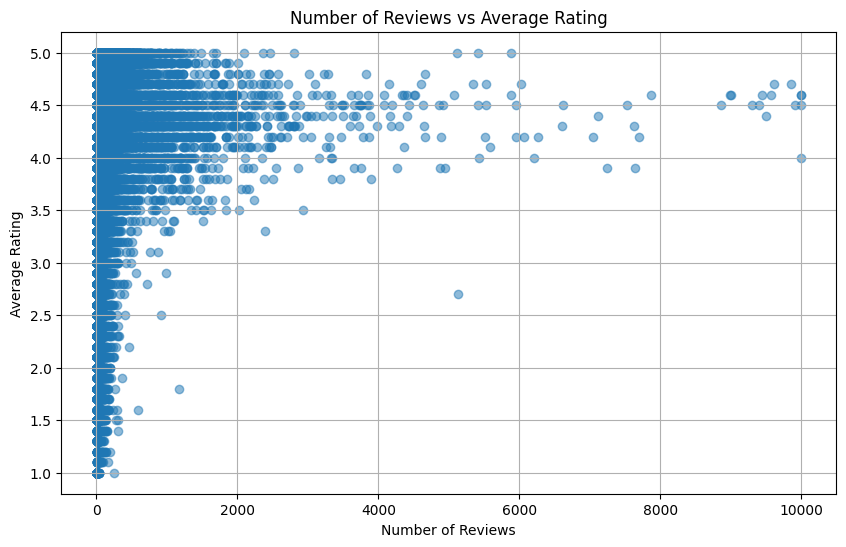

In [43]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(x, y, alpha=0.5)  # Create scatter plot with transparency

plt.title('Number of Reviews vs Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')

plt.grid(True)  # Add gridlines for better readability
plt.show()

## Business - YELP

## User - YELP

## Review - YELP

## Tips/Checkin - YELP